In [52]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [54]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print('Number of training examples: ' + str(m_train))
print('Number of test examples: ' + str(m_test))
print('Each image is of size : (' + str(num_px) + ", " + str(num_px) + ", 3)")
print('train_x_orig shape' + str(train_x_orig.shape))
print('train_y shape' + str(train_y.shape))
print('test_x_orig shape' + str(test_x_orig.shape))
print('test_y shape' + str(test_y.shape))


Number of training examples: 209
Number of test examples: 50
Each image is of size : (64, 64, 3)
train_x_orig shape(209, 64, 64, 3)
train_y shape(1, 209)
test_x_orig shape(50, 64, 64, 3)
test_y shape(1, 50)


y = 0. It's a non-cat picture.


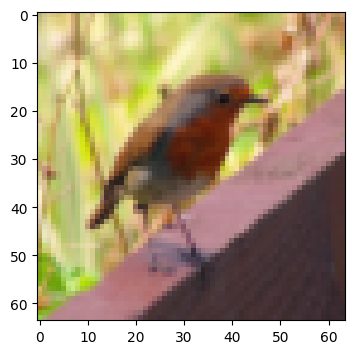

In [55]:
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

y = 1. It's a cat picture.


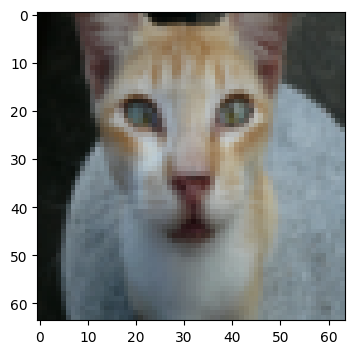

In [56]:
index = 11
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [57]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

print("train_x's shape: " + str(train_x.shape))
print("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [58]:
# CONSTANTS DEFINING THE MODEL
n_x = 64*64*3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [59]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075,num_iters=3000,print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []
    (n_x, n_h, n_y) = layers_dims

    parameters = initialize_parameters(n_x, n_h, n_y)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Gradient Descent
    for i in range(0, num_iters):
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID.
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        # Compute cost
        cost = compute_cost(A2, Y)
        # Initializing backward Prpagation
        dA2 = -(np.divide(Y, A2) - np.divide(1-Y, 1-A2))
        # Backward Propagation
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')

        grads["dW1"] = dW1
        grads["db1"] = db1
        grads["dW2"] = dW2
        grads["db2"] = db2

        # Update the parameters
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)

        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']

        if print_cost and i % 100 == 0:
            print("Cost after iteraion {}: {}".format(i, np.squeeze(cost)))
            costs.append(cost)

    #Plot the Cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters


Cost after iteraion 0: 0.693049735659989
Cost after iteraion 100: 0.6464320953428849
Cost after iteraion 200: 0.6325140647912678
Cost after iteraion 300: 0.6015024920354665
Cost after iteraion 400: 0.5601966311605748
Cost after iteraion 500: 0.515830477276473
Cost after iteraion 600: 0.4754901313943325
Cost after iteraion 700: 0.433916315122575
Cost after iteraion 800: 0.4007977536203886
Cost after iteraion 900: 0.3580705011323798
Cost after iteraion 1000: 0.3394281538366413
Cost after iteraion 1100: 0.3052753636196265
Cost after iteraion 1200: 0.2749137728213016
Cost after iteraion 1300: 0.24681768210614854
Cost after iteraion 1400: 0.19850735037466116
Cost after iteraion 1500: 0.1744831811255665
Cost after iteraion 1600: 0.17080762978096659
Cost after iteraion 1700: 0.11306524562164712
Cost after iteraion 1800: 0.09629426845937149
Cost after iteraion 1900: 0.08342617959726863
Cost after iteraion 2000: 0.07439078704319083
Cost after iteraion 2100: 0.06630748132267933
Cost after iterai

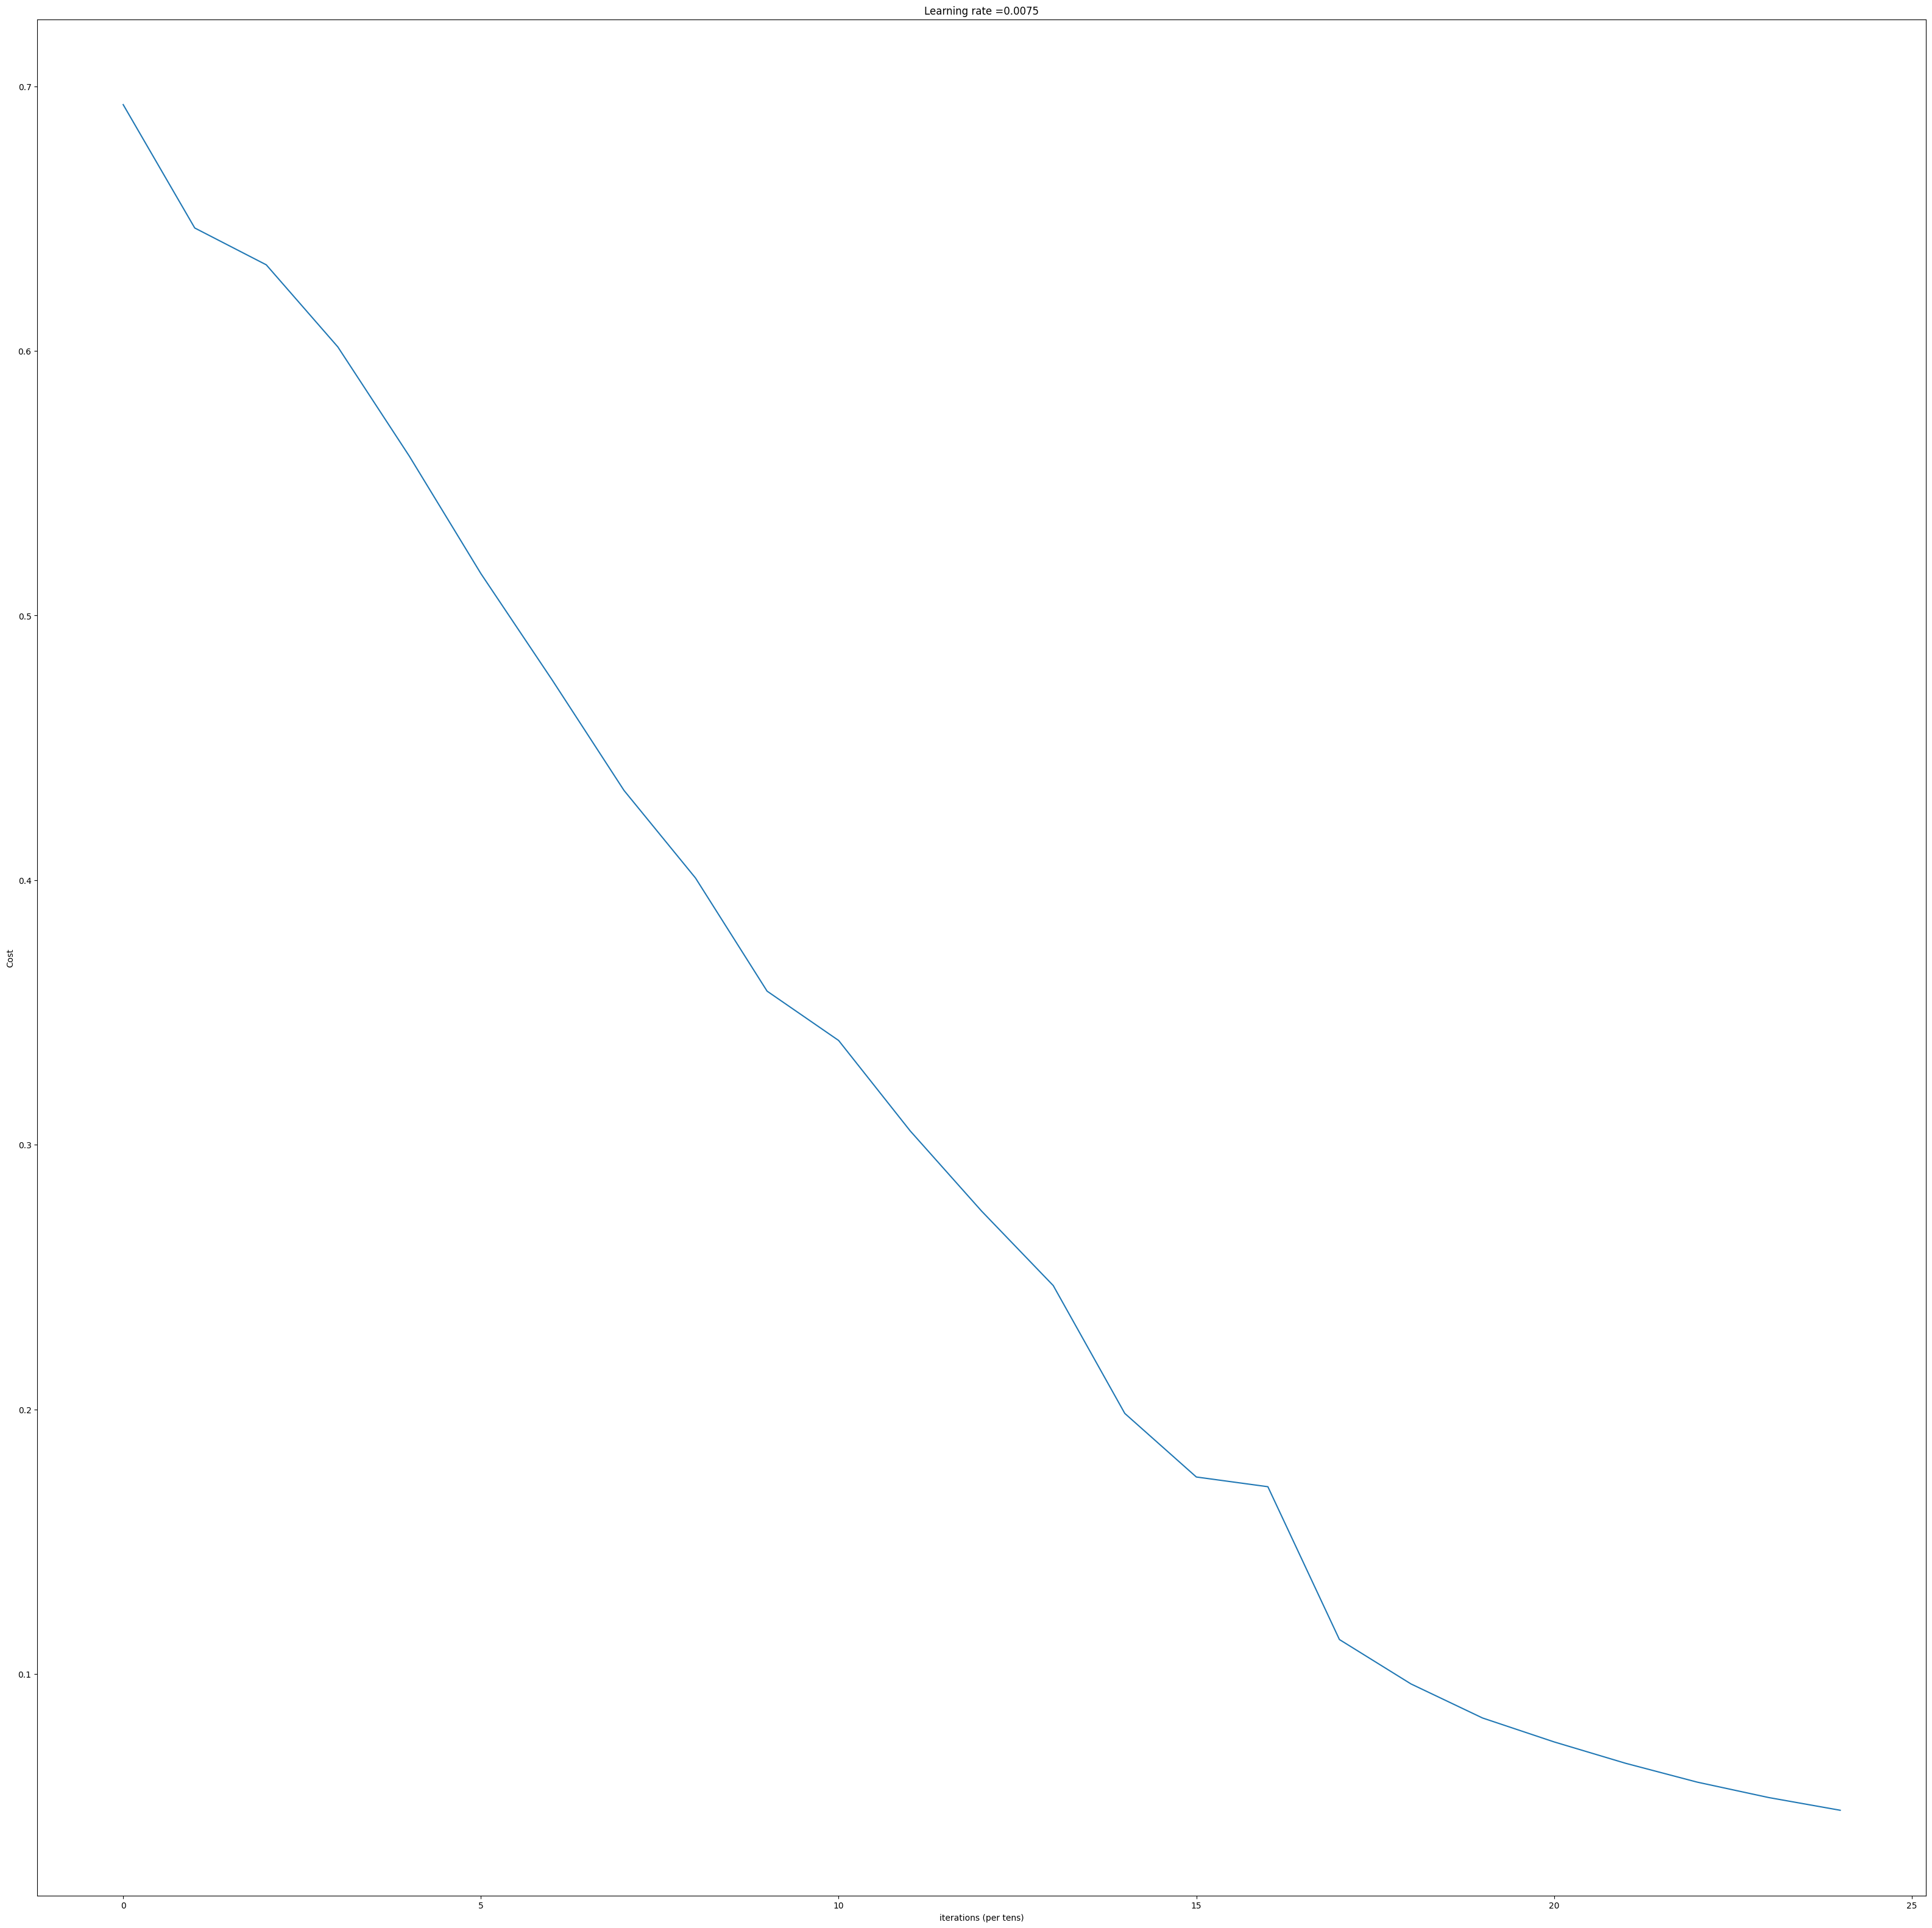

In [73]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iters = 2500, print_cost=True)

In [61]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [62]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


In [63]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost=False):

    np.random.seed(1)
    costs = []
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)


    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

In [64]:

layers_dims = [12288, 25, 9, 1] # 4-layer model


In [65]:
len(layers_dims)

4

Cost after iteration 0: 0.674132
Cost after iteration 100: 0.525202
Cost after iteration 200: 0.447020
Cost after iteration 300: 0.380391
Cost after iteration 400: 0.321058
Cost after iteration 500: 0.246803
Cost after iteration 600: 0.212632
Cost after iteration 700: 0.117944
Cost after iteration 800: 0.082525
Cost after iteration 900: 0.059919
Cost after iteration 1000: 0.042637
Cost after iteration 1100: 0.032609
Cost after iteration 1200: 0.026054
Cost after iteration 1300: 0.021506
Cost after iteration 1400: 0.018023
Cost after iteration 1500: 0.015330
Cost after iteration 1600: 0.013224
Cost after iteration 1700: 0.011569
Cost after iteration 1800: 0.010231
Cost after iteration 1900: 0.009132
Cost after iteration 2000: 0.008203
Cost after iteration 2100: 0.007425
Cost after iteration 2200: 0.006767
Cost after iteration 2300: 0.006201
Cost after iteration 2400: 0.005705


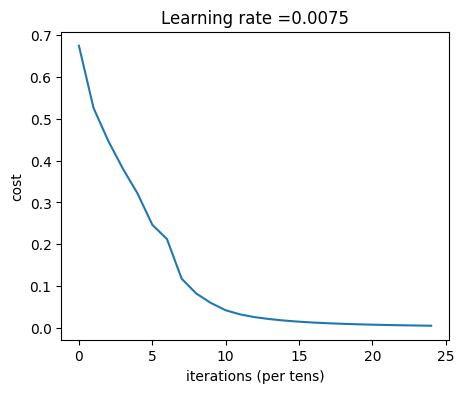

In [66]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations= 2500, print_cost = True)

In [67]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [68]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.74


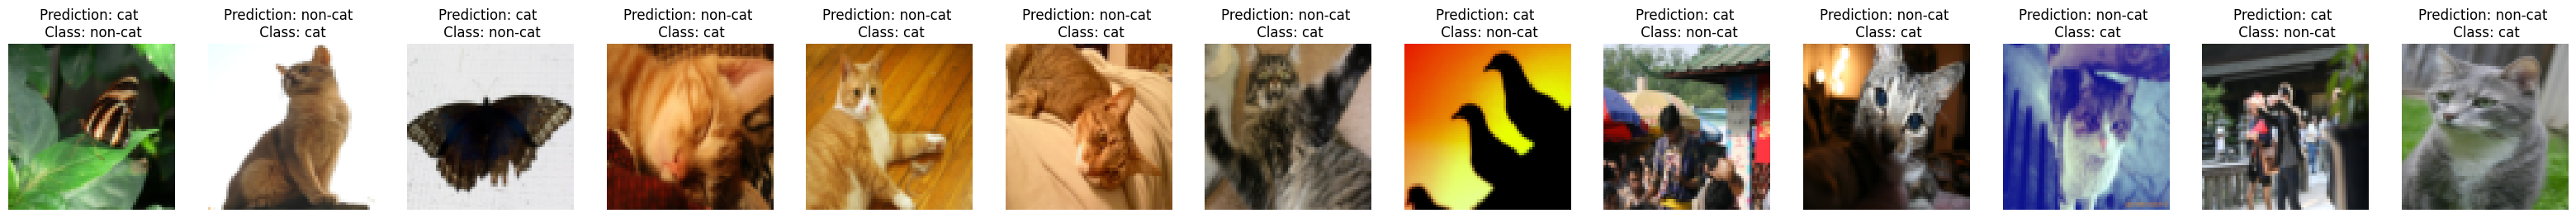

In [71]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

Accuracy: 1.0
Your L-layer model predicts a "cat" picture.


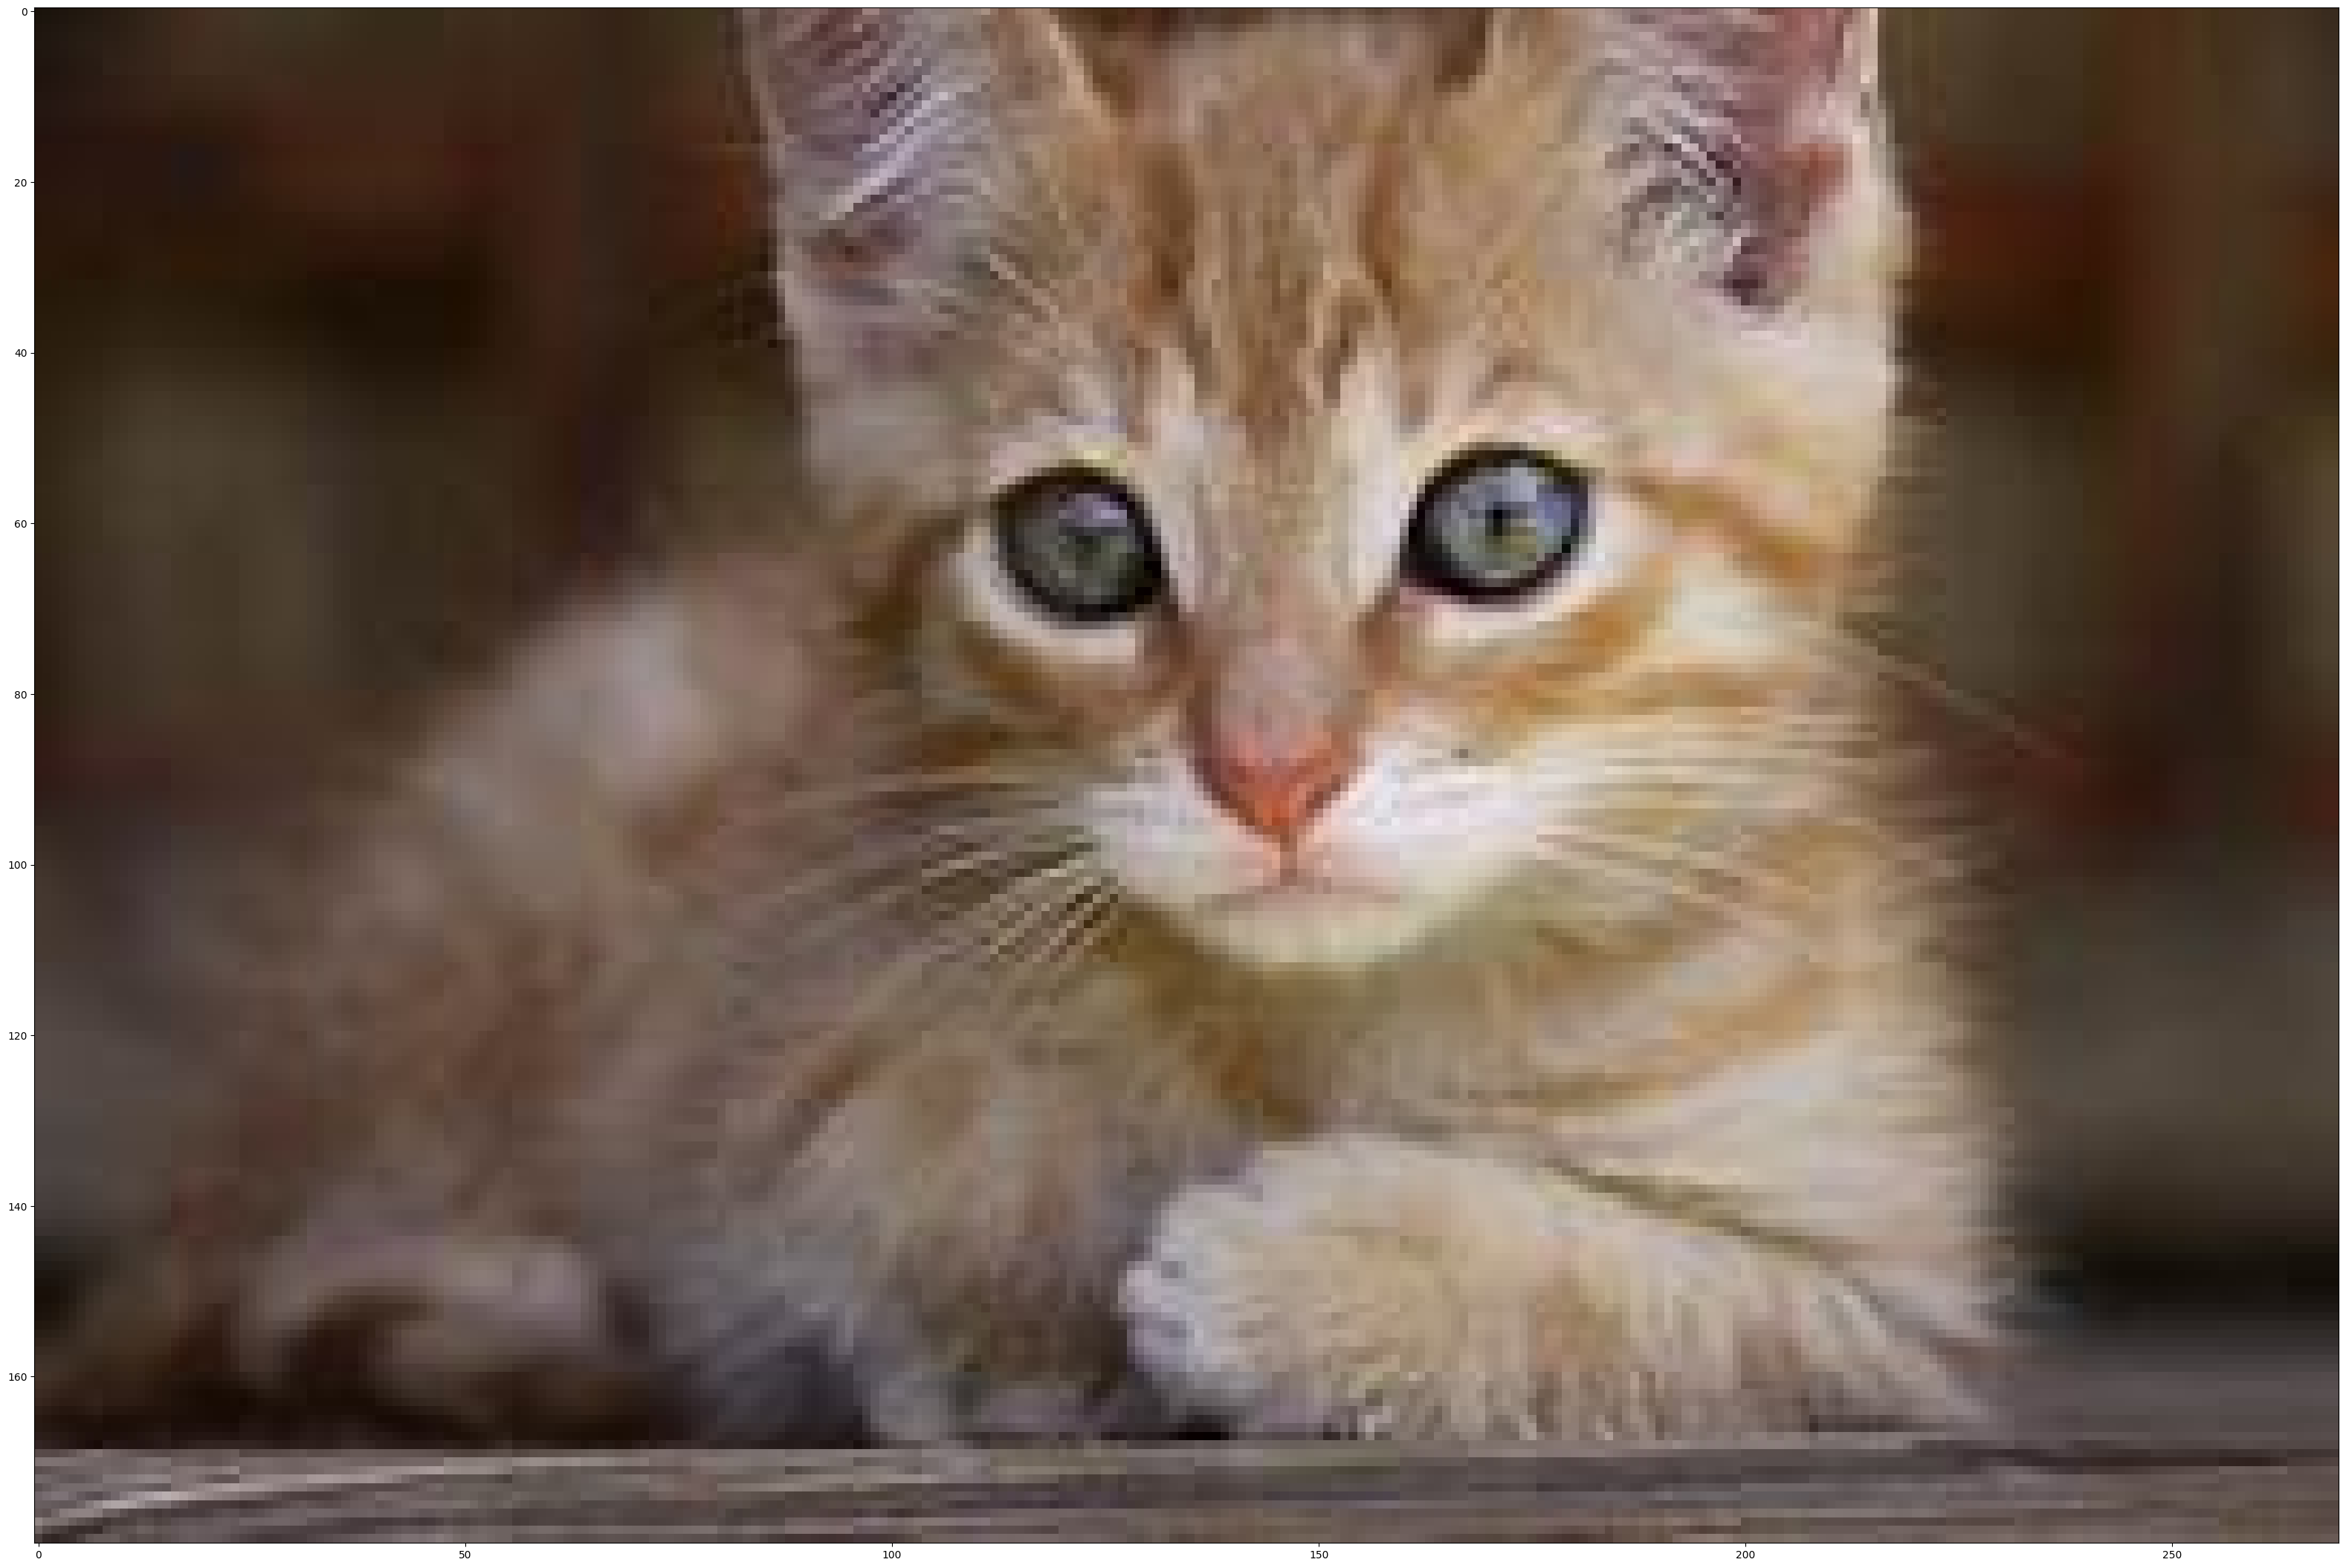

In [74]:
from skimage.transform import resize

my_image = "cat.jpeg"
my_label_y = [1]

fname = "images/" + my_image
image = np.array(Image.open(fname))
my_image = resize(image, (num_px, num_px)).reshape((1, -1)).T
my_image = my_image / 255.

my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
predicted_class = "cat" if my_predicted_image > 0.5 else "non-cat"
print(f"Your L-layer model predicts a \"{predicted_class}\" picture.")
